In [1]:
import numpy as np
import torch
import torchvision as tv
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Normalize((0.5,), (0.5,)),
])

trainset = tv.datasets.MNIST('./data', download=True, transform=transform, train=True)
valset = tv.datasets.MNIST('./data', download=True, transform=transform, train=False)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


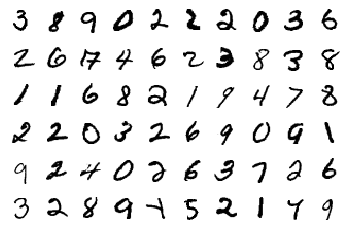

In [4]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [5]:
input_size = 28*28
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1], output_size),
    nn.LogSoftmax(dim=1)
)

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [6]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [7]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        ...,
        [-0.0051, -0.0051, -0.0051,  ..., -0.0051, -0.0051, -0.0051],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014]])


In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.649027800818941
Epoch 1 - Training loss: 0.2839884878491669
Epoch 2 - Training loss: 0.22307225881116605
Epoch 3 - Training loss: 0.1796460699782506
Epoch 4 - Training loss: 0.15011592245678593
Epoch 5 - Training loss: 0.1291859768597143
Epoch 6 - Training loss: 0.1132214898273333
Epoch 7 - Training loss: 0.09900282667393782
Epoch 8 - Training loss: 0.08850457308802015
Epoch 9 - Training loss: 0.08034415847099603
Epoch 10 - Training loss: 0.07256856289352658
Epoch 11 - Training loss: 0.06677369092023179
Epoch 12 - Training loss: 0.059849615789391894
Epoch 13 - Training loss: 0.05544211294776055
Epoch 14 - Training loss: 0.05272410792692789

Training Time (in minutes) = 3.5995341022809346


In [9]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9746


In [11]:
torch.save(model, '.\mnist_model.pt')

FileNotFoundError: [Errno 2] No such file or directory: '.models/mnist_model.pt'

In [17]:
torch.cuda.get_device_capability()

(6, 1)